In [1]:
import numpy as np
import datetime
import os
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import chi
from scipy import stats
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from functions import mean_gen, varx_gen, vary_gen, spherical_data, test_on_integers
from functions import learn_parameters, likelihood_ratio, compare_learning, compare_learning_thorough
from runs import run_angles_lr
from tensorflow.python.framework.ops import disable_eager_execution

2022-09-14 12:32:28.071461: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-14 12:32:28.071489: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# GENERATE ANGLES FOR DATA
seed=1234
x, y = np.linspace(1,6,6), np.linspace(1,3,3)
X, Y = np.meshgrid(x,y)
points = np.transpose(np.vstack([X.ravel(), Y.ravel()]))

# GENERATE DATA AND RUN PARAM_FINDER
n = 10000
best_guesses = []
for p in points:
    thetas, phis = p[0] * np.ones(n), p[1] * np.ones(n)
    x_train, _, y_train, _ = spherical_data(n, thetas, phis, seed)
    x_inputs = x_train[:, 0:2]
    bg = run_angles_lr(x_inputs, y_train, seed)
    best_guesses.append(bg)
    


# GENERATE DATA
# n = 10000
# angles = points[0]
# thetas, phis = angles[0] * np.ones(n), angles[1] * np.ones(n)
# x_train, x_test, y_train, y_test = spherical_data(n, thetas, phis, seed)
# x_inputs = x_train[:, 0:2]

# bg = run_angles_lr(x_inputs, y_train, seed)

# print(points)

# listlist = []
# for p in points:
#     listp = run_angles_lr(p, 10000, seed)
#     listlist.append(listp)

2022-09-14 12:32:30.318474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-14 12:32:30.318507: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-14 12:32:30.318532: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-matan): /proc/driver/nvidia/version does not exist
2022-09-14 12:32:30.318895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6705
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6705
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6805
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6705
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6747
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6886


160/160 [==============================] - 0s 2ms/step - loss: 0.6802
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6829
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6841
best guess is [0.9731531 0.9920792]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6718
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6717
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6727
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6744


160/160 [==============================] - 0s 2ms/step - loss: 0.6717
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6717
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6720
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6730
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6743
best guess is [2.05445   1.0084465]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6836


160/160 [==============================] - 0s 2ms/step - loss: 0.6823
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6857
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6840
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6822
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6821
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6824
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.7437


160/160 [==============================] - 0s 2ms/step - loss: 0.6833
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6855
best guess is [3.0940778  0.94960976]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6784
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6796
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6794
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6811


160/160 [==============================] - 0s 2ms/step - loss: 0.6796
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6777
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6779
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6780
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6799
best guess is [3.875369  1.0869604]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6768
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6951


160/160 [==============================] - 0s 2ms/step - loss: 0.6828
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6803
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6935
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6784
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6770
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6775
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)


160/160 [==============================] - 0s 2ms/step - loss: 0.6805
best guess is [-1.21152    0.9730638]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6713
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6714
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6992
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6759
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.7042


160/160 [==============================] - 0s 2ms/step - loss: 0.7012
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6722
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6722
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.7049
best guess is [-0.22623649  0.9882644 ]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6122
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6122
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6219


160/160 [==============================] - 0s 2ms/step - loss: 0.6122
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6122
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6136
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6124
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6123
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6126


160/160 [==============================] - 0s 2ms/step - loss: 0.6122
best guess is [0.9291106 1.9480755]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6230
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6209
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6208
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6208
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6208
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6399


160/160 [==============================] - 0s 2ms/step - loss: 0.6208
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 1s 3ms/step - loss: 0.6208
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6208
best guess is [1.9323397 2.0029671]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6388
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6360
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6343


160/160 [==============================] - 0s 2ms/step - loss: 0.6343
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6343
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6343
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 3ms/step - loss: 0.6343
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6343
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6343
best guess is [3.0182135 2.0595214]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6709


160/160 [==============================] - 0s 2ms/step - loss: 0.6376
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6451
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6352
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6368
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6351
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6351
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)


160/160 [==============================] - 0s 2ms/step - loss: 0.6351
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6352
best guess is [3.971264  1.9634316]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6224
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6258
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6225
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6403


160/160 [==============================] - 0s 2ms/step - loss: 0.6361
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6250
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6224
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6224
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6224
best guess is [5.061536  1.9598681]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5978
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6416


160/160 [==============================] - 0s 2ms/step - loss: 0.5980
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5978
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 3ms/step - loss: 0.6054
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5993
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5978
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5978


160/160 [==============================] - 0s 2ms/step - loss: 0.5978
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5978
best guess is [5.9536486 2.0280287]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5949
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5785
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5778
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5782
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5820


160/160 [==============================] - 0s 2ms/step - loss: 0.5781
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5778
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5778
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5780
best guess is [1.0437468 2.996936 ]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5970
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5825


160/160 [==============================] - 0s 2ms/step - loss: 0.5819
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5808
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5808
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5809
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5810
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5807
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5809


160/160 [==============================] - 0s 2ms/step - loss: 0.5808
best guess is [5.050378 3.284239]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.6011
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5867
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5852
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5852
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5851
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)


160/160 [==============================] - 0s 2ms/step - loss: 0.5851
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5852
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5851
best guess is [3.050357  3.0158532]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5990
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5851
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5833


160/160 [==============================] - 0s 2ms/step - loss: 0.5833
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5837
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5834
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5833
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5833
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5836
best guess is [1.0391661 3.3078628]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.7023


160/160 [==============================] - 0s 2ms/step - loss: 0.6008
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5868
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5852
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5855
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5853
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5852


160/160 [==============================] - 0s 2ms/step - loss: 0.5852
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5852
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5853
best guess is [1.1042094 3.2570305]
Initialized at  tf.Tensor([0.  0.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5972
Initialized at  tf.Tensor([1. 1.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5794
Initialized at  tf.Tensor([1. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5787
Initialized at  tf.Tensor([2.  1.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5954


160/160 [==============================] - 0s 2ms/step - loss: 0.5790
Initialized at  tf.Tensor([3. 2.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5786
Initialized at  tf.Tensor([4.  2.5], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5790
Initialized at  tf.Tensor([5. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5787
Initialized at  tf.Tensor([6. 3.], shape=(2,), dtype=float32)
160/160 [==============================] - 0s 2ms/step - loss: 0.5786
best guess is [6.090822  2.9576297]


In [3]:
print(points)
print(np.round(np.array(best_guesses) % (2 * np.pi), 1))

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [1. 2.]
 [2. 2.]
 [3. 2.]
 [4. 2.]
 [5. 2.]
 [6. 2.]
 [1. 3.]
 [2. 3.]
 [3. 3.]
 [4. 3.]
 [5. 3.]
 [6. 3.]]
[[1.  1. ]
 [2.1 1. ]
 [3.1 0.9]
 [3.9 1.1]
 [5.1 1. ]
 [6.1 1. ]
 [0.9 1.9]
 [1.9 2. ]
 [3.  2.1]
 [4.  2. ]
 [5.1 2. ]
 [6.  2. ]
 [1.  3. ]
 [5.1 3.3]
 [3.1 3. ]
 [1.  3.3]
 [1.1 3.3]
 [6.1 3. ]]


Text(0, 0.5, 'Error %')

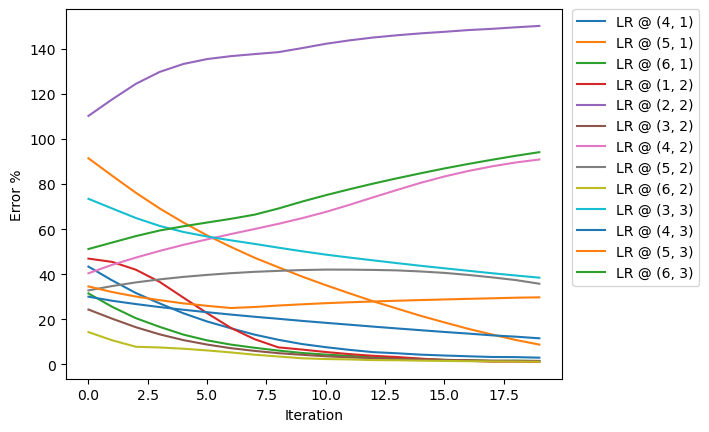

In [5]:
for i in range(18):
    if i == 0 or i == 1 or i == 2 or i == 12 or i == 13:
        continue
    a1 = np.array(listlist[i])
    angles = points[i]
    e = 100 * np.sum(np.abs((angles - a1) / angles), axis = 1)/2
    plt.plot(e, label='LR @ (%.0f, %.0f)' % (angles[0], angles[1]))
    
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Iteration')
plt.ylabel('Error %')

In [22]:
points;

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [1., 2.],
       [2., 2.],
       [3., 2.],
       [4., 2.],
       [5., 2.],
       [6., 2.],
       [1., 3.],
       [2., 3.],
       [3., 3.],
       [4., 3.],
       [5., 3.],
       [6., 3.]])